In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# importing necessary libraries

# Ques2(a)

In [4]:
df = pd.read_excel('default of credit card clients.xls')
col = df.iloc[0]
df.columns = col
df = df.iloc[1:,1:]
pd.set_option('display.max_columns', None)
df
#loading data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [6]:
df.isnull().sum()
#checking for null value
#no null values

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

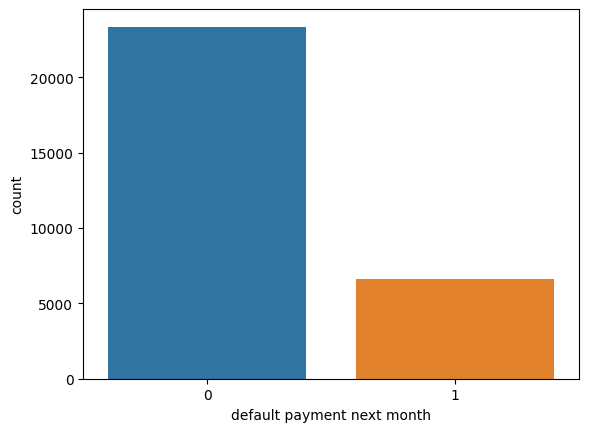

In [7]:
sns.countplot(x="default payment next month", data=df)
plt.show()
#data is unbalanced

In [8]:
df = pd.get_dummies(df, columns = ['SEX','EDUCATION','MARRIAGE'])
# encoding the categorical values

In [9]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,1,0,0,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [10]:
label = df['default payment next month']
df = df.drop(['default payment next month'],axis=1)
#extracting features and labels from data

In [11]:
model = MinMaxScaler().fit(df)
df_sc = pd.DataFrame(model.transform(df))
df_sc.head()
df_sc.columns = df.columns
df_sc.head()
#scaling values

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Ques2(b)

In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(df_sc, list(label),  random_state=9)
#splitting data in train and test

In [13]:
rF=RandomForestClassifier(random_state=9)
#intialising RandomForestClassifier at random_state=9

In [14]:
rF.fit(x_tr, list(y_tr))
y_pr = rF.predict(x_te)
print(metrics.classification_report(y_te, y_pr))
#fitting the random forest classifier

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5858
           1       0.62      0.36      0.46      1642

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



# Ques2(c)

In [15]:
max_d = [2,4,6,8,10,12,14,16,18,20] 
model_cv = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': max_d},
             scoring='accuracy', verbose=0,return_train_score=True)

model_cv.fit(x_tr, y_tr)
#finding optimum value fo max_depth

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
             return_train_score=True, scoring='accuracy')

In [16]:
model_cv.best_params_
#finding best value of max_depth
#which is increasing model efficiency

{'max_depth': 8}

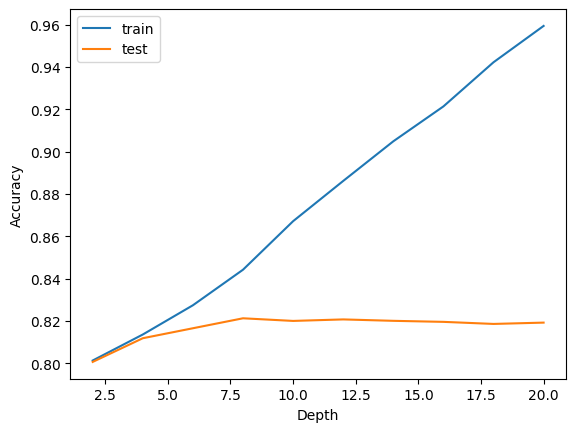

In [17]:
plt.plot(max_d, model_cv.cv_results_['mean_train_score'], label = 'train')
plt.plot(max_d, model_cv.cv_results_['mean_test_score'], label = 'test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#plotting train and test accuracy wrt to depth
#test is having max accuracy around 10 to 12.5

# Ques2(d)

In [18]:
n_e= [100,150,200]
m_cv_est = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': n_e},
             scoring='accuracy', verbose=0,return_train_score=True)

m_cv_est.fit(x_tr, y_tr)
#finding optimum values for n_estimators

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [19]:
m_cv_est.best_params_

#finding best value of n_estimators
#which is increasing model efficiency

{'n_estimators': 200}

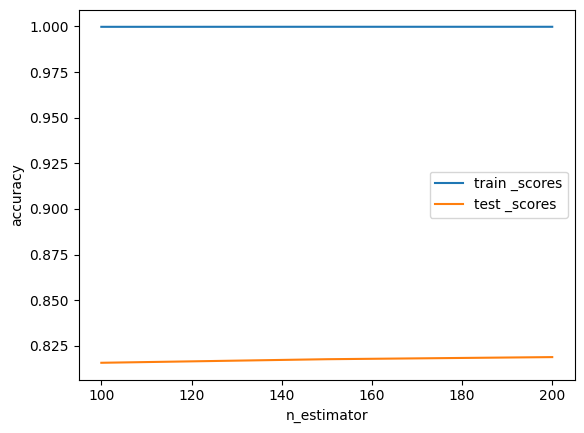

In [20]:
plt.plot(n_e,m_cv_est.cv_results_['mean_train_score'], label = 'train _scores')
plt.plot(n_e, m_cv_est.cv_results_['mean_test_score'], label = 'test _scores')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plotting train and test accuracy wrt to n_estimator
#test is having max accuracy around 150 to 160

# Ques2(e)

In [21]:
m_cv = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100,150,200],'max_depth': [8,10,12], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],'max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=0,return_train_score=True)

m_cv.fit(x_tr, y_tr)
#Using GridSearchCV tune the following hyper-parameters: ’max depth’,
#’min samples leaf’, ’min samples split’, ’n estimators’, ’max features’

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [22]:
m_cv.best_params_
#optimal values for following ’max depth’,
#’min samples leaf’, ’min samples split’, ’n estimators’, ’max features’

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

# Ques2(f)

In [23]:
model_best = RandomForestClassifier(max_depth = 10,
 max_features = 'log2',
 min_samples_leaf =  2,
 min_samples_split = 10,
 n_estimators = 200)

model_best.fit(x_tr,y_tr)
y_pred = model_best.predict(x_te)

print("accuracy of best model", metrics.accuracy_score(y_te, y_pr), "\n")
#Reporting accuracy of the best model 
#based on hyper-parameter tuning of the above model.

accuracy of best model 0.8121333333333334 



In [24]:
print(metrics.classification_report(y_te, y_pr))
#Reporting the classification report of the best model 
#based on hyper-parameter tuning of the above model.

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5858
           1       0.62      0.36      0.46      1642

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

